In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv('train_HK6lq50.csv')
df_test=pd.read_csv('test_wF0Ps6O.csv')

In [4]:
df_train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [9]:
df_train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [22]:
df_train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [32]:
Nan_columns=[df_train.columns[i] for i in range(len(df_train.dtypes)) if df_train.isna().any()[i]==True] 

#### trainee id column is quite irrelevant we will remove it as it formed from combination of program id + program type

In [34]:
df_train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


No. of 1s and 0s in is_class target label
-----------------------------------------
1    0.695408
0    0.304592
Name: is_pass, dtype: float64


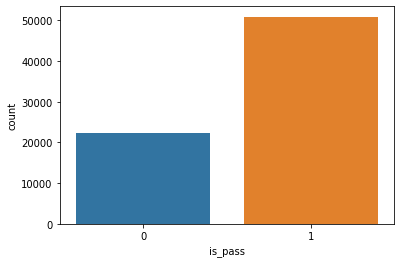

In [41]:
## is the Target(is_pass) is Imbalance? We will answer it here.
print('No. of 1s and 0s in is_class target label')
print('-----------------------------------------')
print(df_train.is_pass.value_counts(normalize=True))
##let's plot it
sns.countplot(df_train.is_pass)

The class is bit imbalance as we can 69% includes class 1 while 31% includes class 0.
We will try to handle this imbalance 

Trainee_engagement_rating(includes:-1,2,3,4 & 5)
-----------------------------------------------
1.0    25595
2.0    17234
4.0    13113
3.0    11553
5.0     5575
Name: trainee_engagement_rating, dtype: int64
Nan Values => 77


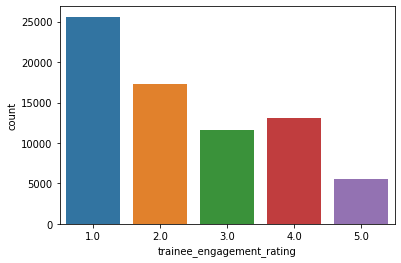

In [130]:
print('Trainee_engagement_rating(includes:-1,2,3,4 & 5)')
print('-----------------------------------------------')
print(df_train.trainee_engagement_rating.value_counts())
print('Nan Values','=>',len(df_train[df_train.trainee_engagement_rating.isna()]))
#let's plot
sns.countplot(df_train.trainee_engagement_rating)

categorical plot on the basis of pass with respect to the engagement ratings
----------------------------------------------------------------------------


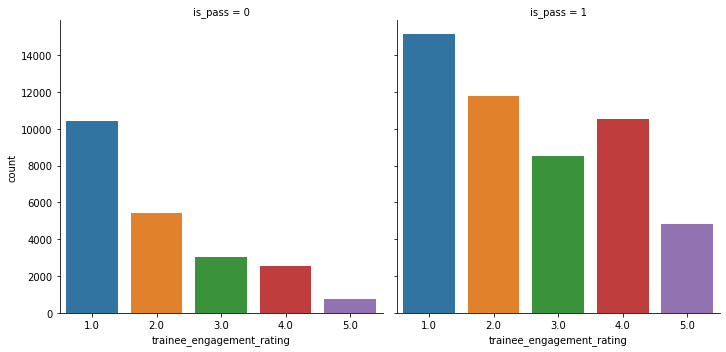

In [71]:
print('categorical plot on the basis of pass with respect to the engagement ratings')

print('----------------------------------------------------------------------------')

sns.catplot(x='trainee_engagement_rating',data=df_train[['trainee_engagement_rating','is_pass']],col='is_pass',kind='count')

In [78]:
print('percentage of total_program_enrolled(values represent count of no of programs enrolled)')
print('------------------------------------')
df_train.total_programs_enrolled.value_counts(normalize=True)*100

percentage of total_program_enrolled(values represent count of no of programs enrolled)
------------------------------------


2     55.419908
4     18.484695
3     10.461126
1     10.283402
5      2.330923
6      1.993246
8      0.410133
7      0.390993
9      0.108002
10     0.041013
12     0.038279
11     0.020507
14     0.017772
Name: total_programs_enrolled, dtype: float64

N    91.018087
Y     8.981913
Name: is_handicapped, dtype: float64
        in %
--------------------------------------------------


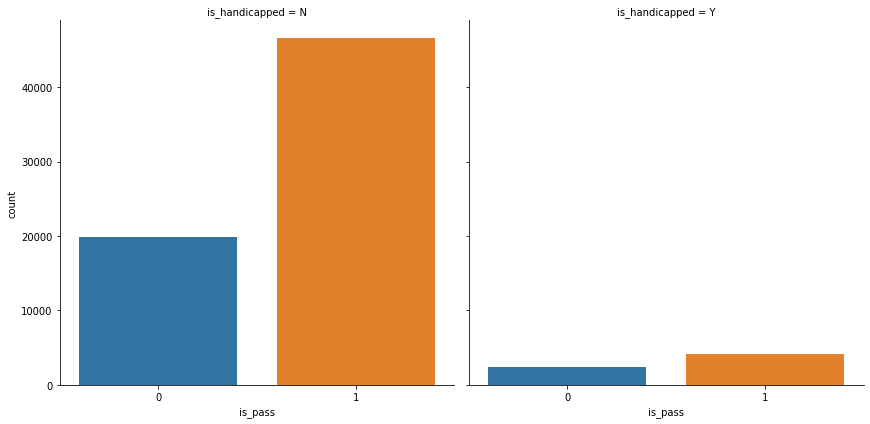

In [91]:
print(df_train.is_handicapped.value_counts(normalize=True)*100)
print('        in %')
print('--------------------------------------------------')
sns.catplot(x="is_pass",col='is_handicapped',data=df_train,height=6, kind="count")

In [107]:
print('City Tire')
print('---------')
print(df_train.city_tier.value_counts(normalize=True)*100)
print('--|--|--|--|--|--|--')
print('--------------------')
print('--|--|--|--|--|--|--')
print('Education')
print('---------')
print(df_train.education.value_counts(normalize=True)*100)

City Tire
---------
3    35.846993
1    31.633560
2    22.283894
4    10.235553
Name: city_tier, dtype: float64
--|--|--|--|--|--|--
--------------------
--|--|--|--|--|--|--
Education
---------
High School Diploma    46.988940
Matriculation          35.775903
Bachelors              15.832502
No Qualification        0.702695
Masters                 0.699960
Name: education, dtype: float64


(<seaborn.axisgrid.FacetGrid at 0x7f6b842a00d0>,)

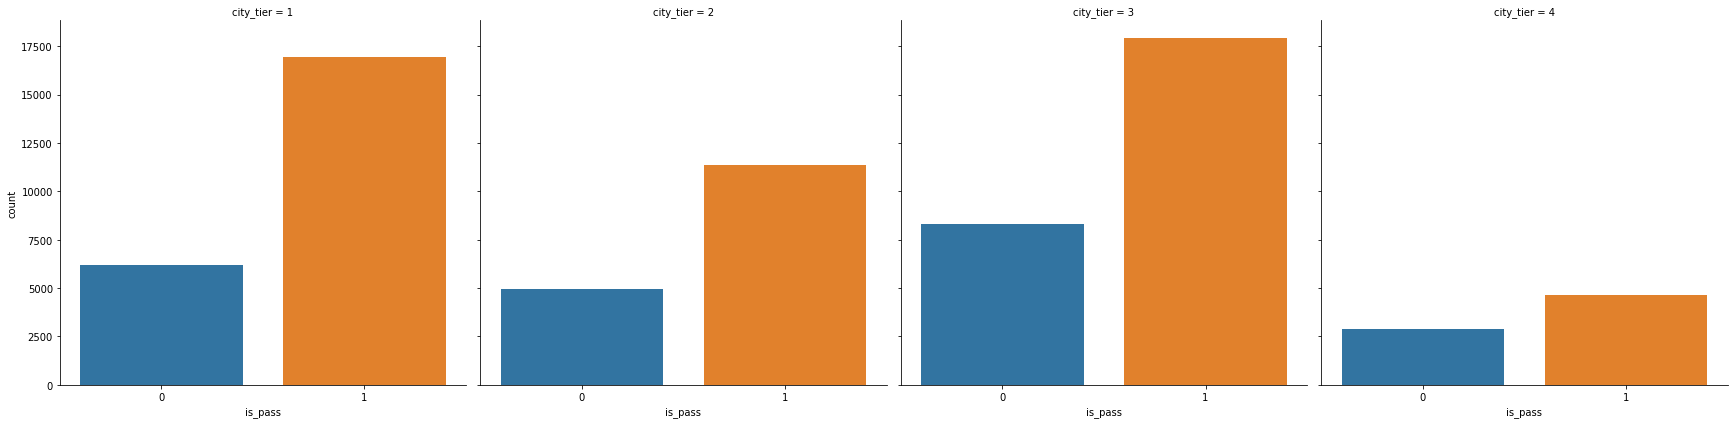

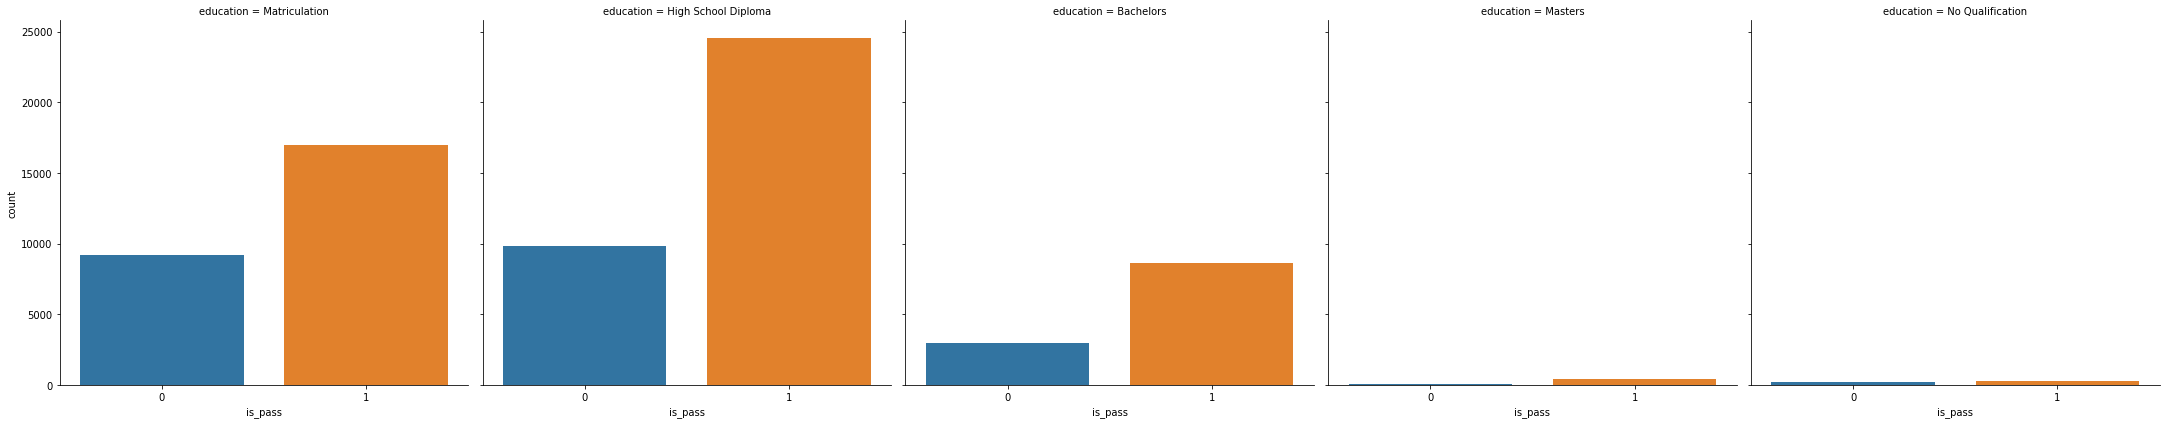

In [118]:
sns.catplot(x="is_pass",col='city_tier',data=df_train,height=6, kind="count")
sns.catplot(x="is_pass",col='education',data=df_train,height=6, kind="count"),

In [131]:
df_train.gender.value_counts()

M    39043
F    34104
Name: gender, dtype: int64

In [128]:
df_train[df_train.age.isna()].age
len(df_train[df_train.age.isna()].age)

27729

In [93]:
df_train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1
